<a href="https://colab.research.google.com/github/Kristian209/Data-lit/blob/master/Exploratory_analysis_lendingclub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this Jupyter Notebook, I will be doing exploratory data analysis on the the LendingClub dataset with the purpose to explore their data science proccess and the kind of people that get loans through them.

###We will first start with finding a few statistical features from the dataset by doing a boxplot vizualization, but before we do that we need to have a solid understanding of the data.

In [0]:
#Step 1: Import libraries

#data preprocessing
import pandas as pd
#matrix math
import numpy as np
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

loan_club_data = '1aypxioe7H7U-VFQx0_JUHhiBixDhB2G0'
downloaded = drive.CreateFile({'id': loan_club_data})
loan_club_dict = '1KofjExKh98OoANZGnZP3CLynaMj5qpIE'
downloaded_1 = drive.CreateFile({'id': loan_club_dict})

downloaded.GetContentFile('LoanStats3a.csv')
downloaded_1.GetContentFile('LCDataDictionary.csv')

     |████████████████████████████████| 993kB 6.4MB/s 


###Information about Lending Club:

####Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. Each borrower fills out a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower’s credit score using past historical data (and their own data science process!) and assigns an interest rate to the borrower. 

###We will use the data dictionary Lending Club provides to get an understanding of the columns to know what each feature represents.

In [3]:
data_dictionary = pd.read_csv('LCDataDictionary.csv') # Loading in the data dictionary
data_dictionary = data_dictionary.dropna(how='all',axis=1)
data_dictionary.head()
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})
print(data_dictionary)

                                           name                                        description
0                                acc_now_delinq  The number of accounts on which the borrower i...
1                          acc_open_past_24mths         Number of trades opened in past 24 months.
2                                    addr_state  The state provided by the borrower in the loan...
3                                      all_util              Balance to credit limit on all trades
4                                    annual_inc  The self-reported annual income provided by th...
5                              annual_inc_joint  The combined self-reported annual income provi...
6                              application_type  Indicates whether the loan is an individual ap...
7                                   avg_cur_bal            Average current balance of all accounts
8                                bc_open_to_buy          Total open to buy on revolving bankcards.
9         

In [0]:
#Clean the dataset
loan_data = pd.read_csv('LoanStats3a.csv',skiprows=1,low_memory=False)
half_count = len(loan_data) / 2
loan_data = loan_data.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
loan_data = filtered_data = loan_data.drop(['desc'],axis=1) # These columns are not useful for our purposes
#Delete annual_inc outliers
for key,value in enumerate(loan_data["annual_inc"]):
  if value > 100000:
    filtered_data = filtered_data.drop(key, axis=0)
filtered_data = filtered_data.dropna(axis=0)

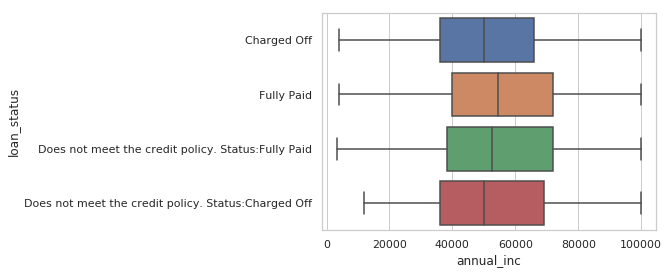

In [144]:
#Create a boxplot to find statistical features
sns.set(style="whitegrid")
ax = sns.boxplot(x=filtered_data["annual_inc"], y=filtered_data["loan_status"])

####Looks like the median annual income is ~$50K

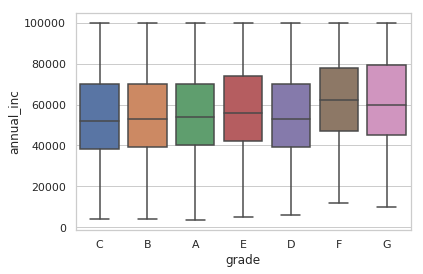

In [145]:
ax = sns.boxplot(x=filtered_data["grade"], y=filtered_data["annual_inc"])

####It looks like income and loan grade have very little correlation, there is not much variance as grade D is similar to Grade A, B, and C

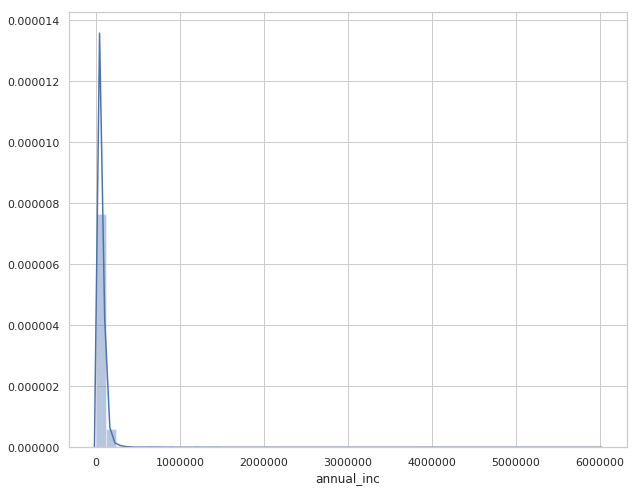

In [146]:
plt.figure(figsize = (10,8))
loan_data['annual_inc'] = pd.to_numeric(loan_data['annual_inc'], errors='coerce')
loan_data = loan_data.dropna(subset=['annual_inc'])
loan_data['annual_inc'] = loan_data['annual_inc'].astype(int)
g = sns.distplot(loan_data['annual_inc'])
g.set_xlabel("annual_inc", fontsize=12)
plt.show()

###From the distribution plot above we can observe that there's a power law, it is highly skewed and highly peaked at the lower end of the annual income spectrum. Most applications are coming from the lower end of the annual income spectrum. 

###We will now build a Naive Bayesian Classifier model to predict the accuracy of the account stauts by taking into account only a few important feautures.

In [155]:
#Build & use a Bayesian Classifier to predict the credit score of a person given other data from the dataset
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Pick relevent features for the dataset(x)
filtered_data["loan_status"] = filtered_data["loan_status"].astype(dtype="str")
loan_data = filtered_data.drop(columns=['term','installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'debt_settlement_flag'])
loan_data = loan_data.dropna(axis=0)
loan_data["int_rate"] = loan_data["int_rate"].replace("%","", regex=True).astype(float)
loan_data = np.array(loan_data)

le = preprocessing.LabelEncoder()

y = le.fit_transform(filtered_data["loan_status"])
X = loan_data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

model_naive = GaussianNB()
model_naive.fit(X_train,y_train)
y_pred_naive_grade = model_naive.predict(X_test)

accuracy_score(y_test,y_pred_naive_grade)



0.786374695863747

##Awesome! 
###Our model gives an accuracy of 79% which isn't bad for a simple implementation.